In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import utils
utils.set_pretty_prints()

In [3]:
import tensorflow as tf

In [4]:
data = tf.keras.datasets.mnist.load_data()

In [5]:
train, dev = data

In [7]:
x_train, y_train = train
x_dev, y_dev = dev

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
(y_train == 8).sum()

5851

In [12]:
(y_train == 0).sum()

5923

In [13]:
y_dev

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
y_dev.shape

(10000,)

In [15]:
(y_dev == 0).sum()

980

In [16]:
(y_dev == 8).sum()

974

In [27]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
np.set_printoptions(linewidth=500)

In [22]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [23]:
y_train[0]

5

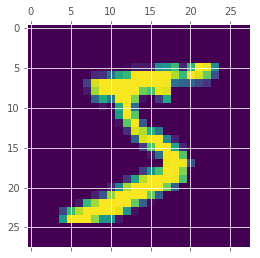

In [24]:
plt.matshow(x_train[0])

<Figure size 432x288 with 0 Axes>

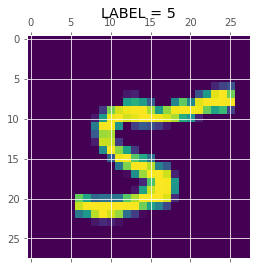

<Figure size 432x288 with 0 Axes>

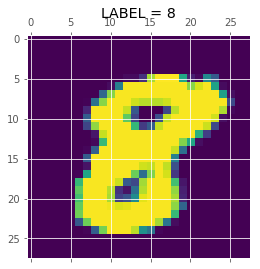

<Figure size 432x288 with 0 Axes>

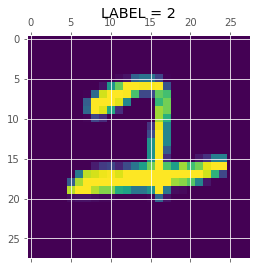

<Figure size 432x288 with 0 Axes>

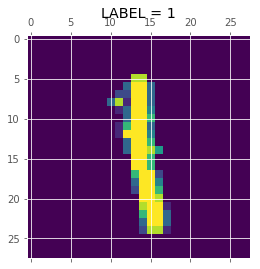

<Figure size 432x288 with 0 Axes>

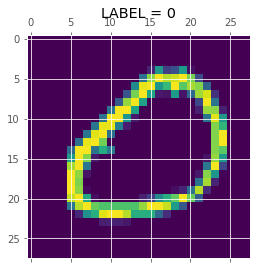

In [26]:
idxs = np.random.choice(6000, size=5)
for idx in idxs:
    plt.figure()
    plt.matshow(x_train[idx])
    plt.title('LABEL = ' + str(y_train[idx]))
    plt.show()

In [29]:
v = [100, 100, 100, 100]
softmax_v = [0.25, 0.25, 0.25, 0.25]

In [37]:
def softmax(v):
    return np.exp(v) / np.exp(v).sum()
    
softmax([100, 200, 300, 400, 500])

1.0

In [38]:
tf_input = tf.keras.layers.Input((28,28), name='intrare', dtype='float32')
tf_x = tf.keras.layers.Flatten(name='mat_to_vect')(tf_input)

tf_x = tf.keras.layers.Dense(512, name='linear1')(tf_x)
tf_x = tf.keras.layers.Activation('relu', name='non_linearity1')(tf_x)
tf_x = tf.keras.layers.Dropout(0.5, name='drop1')(tf_x)

tf_x = tf.keras.layers.Dense(256, name='linear1')(tf_x)
tf_x = tf.keras.layers.Activation('relu', name='non_linearity1')(tf_x)
tf_x = tf.keras.layers.Dropout(0.5, name='drop1')(tf_x)

tf_out = tf.keras.layers.Dense(10, activation='softmax', name='iesire')(tf_x)


In [40]:
def get_model(input_shape=(28,28), layers=[512, 256], activation='relu', dropout=0.5):
    tf_input = tf.keras.layers.Input(input_shape, name='intrare', dtype='float32')
    tf_x = tf.keras.layers.Flatten(name='mat_to_vect')(tf_input)
    
    for i,layer in enumerate(layers):
        tf_x = tf.keras.layers.Dense(layer, name='linear_'+str(i+1))(tf_x)
        tf_x = tf.keras.layers.Activation(activation, name='non_linearitate_'+str(i+1))(tf_x)
        tf_x = tf.keras.layers.Dropout(dropout, name='drop_'+str(i+1))(tf_x)

    tf_out = tf.keras.layers.Dense(10, activation='softmax', name='iesire')(tf_x)
    
    model = tf.keras.models.Model(tf_input, tf_out, name='model_din_functie')
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [47]:
def train_model(model):
    model.fit(x_train, y_train, validation_data=(x_dev, y_dev), epochs=10, batch_size=128)

In [41]:
m1 = get_model(layers=[512, 256])
train_model(m1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 163us/sample - loss: 10.7227 - acc: 0.3329 - val_loss: 10.0722 - val_acc: 0.3747
Epoch 2/10
60000/60000 [==============================] - 9s 156us/sample - loss: 9.9704 - acc: 0.3808 - val_loss: 8.7870 - val_acc: 0.4543
Epoch 3/10
60000/60000 [==============================] - 9s 149us/sample - loss: 9.2040 - acc: 0.4283 - val_loss: 8.9356 - val_acc: 0.4450
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 7.6202 - acc: 0.5267 - val_loss: 6.2243 - val_acc: 0.6135
Epoch 5/10
60000/60000 [==============================] - 9s 152us/sample - loss: 7.1646 - acc: 0.5550 - val_loss: 6.7430 - val_acc: 0.5814
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 6.8036 - acc: 0.5775 - val_loss: 6.5945 - val_acc: 0.5908
Epoch 7/10
60

In [42]:
y_pred = m1.predict(x_dev)

In [43]:
y_pred[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred_labels = y_pred.argmax(axis=1)

In [45]:
y_pred_labels[:10]

array([7, 6, 1, 0, 4, 1, 4, 4, 6, 4])

In [46]:
(y_pred_labels == y_dev).sum() / y_dev.shape[0]

0.615

In [48]:
m2 = get_model(layers=[1024, 512])
train_model(m2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 297us/sample - loss: 12.5072 - acc: 0.2233 - val_loss: 11.9505 - val_acc: 0.2584
Epoch 2/10
60000/60000 [==============================] - 17s 290us/sample - loss: 12.2779 - acc: 0.2381 - val_loss: 12.1840 - val_acc: 0.2439
Epoch 3/10
44032/60000 [=====================>........] - ETA: 5s - loss: 12.0726 - acc: 0.2508

KeyboardInterrupt: 

In [49]:
m3 = get_model(layers=[256, 128])
train_model(m3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 9.8987 - acc: 0.3814 - val_loss: 7.2917 - val_acc: 0.5465
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 7.5787 - acc: 0.5275 - val_loss: 6.1426 - val_acc: 0.6180
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 6.9846 - acc: 0.5649 - val_loss: 5.7926 - val_acc: 0.6394
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 6.5268 - acc: 0.5934 - val_loss: 5.6466 - val_acc: 0.6484
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 6.3217 - acc: 0.6062 - val_loss: 4.8699 - val_acc: 0.6971
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 5.7892 - acc: 0.6395 - val_loss: 4.6564 - val_acc: 0.7103
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 5.2092 - acc: 0.6758 - val_loss: 

In [50]:
m4 = get_model(layers=[512], dropout=0.2)
train_model(m4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 8.8851 - acc: 0.4469 - val_loss: 8.4469 - val_acc: 0.4753
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 8.6735 - acc: 0.4612 - val_loss: 8.9310 - val_acc: 0.4454
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 8.5100 - acc: 0.4717 - val_loss: 8.2358 - val_acc: 0.4888
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 8.4751 - acc: 0.4739 - val_loss: 8.3517 - val_acc: 0.4815
Epoch 5/10
60000/60000 [==============================] - 9s 144us/sample - loss: 8.4624 - acc: 0.4747 - val_loss: 8.3539 - val_acc: 0.4815
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 8.4605 - acc: 0.4748 - val_loss: 8.2184 - val_acc: 0.4897
Epoch 7/10
60000/60000 [==============================] - 7s 117us/sample - loss: 8.4557 - acc: 0.4752 - val_l

In [51]:
m5 = get_model(layers=[])


In [52]:
m5.summary()

Model: "model_din_functie"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
intrare (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
mat_to_vect (Flatten)        (None, 784)               0         
_________________________________________________________________
iesire (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [53]:
train_model(m5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 8.7672 - acc: 0.4521 - val_loss: 6.9697 - val_acc: 0.5647
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 6.1018 - acc: 0.6181 - val_loss: 4.6768 - val_acc: 0.7053
Epoch 3/10
60000/60000 [==============================] - 2s 42us/sample - loss: 4.2705 - acc: 0.7309 - val_loss: 3.9791 - val_acc: 0.7510
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 4.0737 - acc: 0.7444 - val_loss: 4.0298 - val_acc: 0.7476
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 3.9903 - acc: 0.7497 - val_loss: 3.8838 - val_acc: 0.7563
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 3.9424 - acc: 0.7530 - val_loss: 4.0813 - val_acc: 0.7439
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 3.9370 - acc: 0.7537 - val_loss: 4.

In [54]:
x_train_norm = (x_train / 255).astype('float32')
x_dev_norm = (x_dev / 255).astype('float32')

def train_model_norm(model):
    model.fit(x_train_norm, y_train, validation_data=(x_dev_norm, y_dev), epochs=10, batch_size=128)

In [55]:
m1_norm = get_model(layers=[512, 256])
train_model_norm(m1_norm)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.3865 - acc: 0.8832 - val_loss: 0.1298 - val_acc: 0.9609
Epoch 2/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1746 - acc: 0.9482 - val_loss: 0.0986 - val_acc: 0.9695
Epoch 3/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1345 - acc: 0.9595 - val_loss: 0.0899 - val_acc: 0.9726
Epoch 4/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.1142 - acc: 0.9648 - val_loss: 0.0749 - val_acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.1040 - acc: 0.9687 - val_loss: 0.0703 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0916 - acc: 0.9719 - val_loss: 0.0698 - val_acc: 0.9791
Epoch 7/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0822 - acc: 0.9747 -

In [57]:
m1_norm.summary()

Model: "model_din_functie"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
intrare (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
mat_to_vect (Flatten)        (None, 784)               0         
_________________________________________________________________
linear_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
non_linearitate_1 (Activatio (None, 512)               0         
_________________________________________________________________
drop_1 (Dropout)             (None, 512)               0         
_________________________________________________________________
linear_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
non_linearitate_2 (Activatio (None, 256)         

In [58]:
m5_norm = get_model(layers=[])
m5_norm.summary()

Model: "model_din_functie"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
intrare (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
mat_to_vect (Flatten)        (None, 784)               0         
_________________________________________________________________
iesire (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [59]:
train_model_norm(m5_norm)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.6739 - acc: 0.8323 - val_loss: 0.3844 - val_acc: 0.9006
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3626 - acc: 0.9020 - val_loss: 0.3208 - val_acc: 0.9123
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3203 - acc: 0.9116 - val_loss: 0.2967 - val_acc: 0.9165
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3000 - acc: 0.9161 - val_loss: 0.2847 - val_acc: 0.9196
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2882 - acc: 0.9195 - val_loss: 0.2794 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2799 - acc: 0.9215 - val_loss: 0.2734 - val_acc: 0.9242
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2742 - acc: 0.9231 - val_loss: 0.

In [60]:
np_img = np.array([[0,0,0,1,1,1], [0,0,0,1,1,1], [0,0,0,1,1,1], [1,1,1,0,0,0], [1,1,1,0,0,0], [1,1,1,0,0,0]])
np_img

array([[0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

In [75]:
np_conv_coefs = np.ones(shape=(3,3))
tf_inp = tf.keras.layers.Input((6,6,1))
lyr_conv = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, use_bias=False)
tf_x = lyr_conv(tf_inp)
model = tf.keras.models.Model(tf_inp, tf_x)

In [76]:
model.predict(np_img.reshape(1,6,6,1)).shape

(1, 4, 4, 1)

In [77]:
lyr_conv.get_weights()

[array([[[[ 0.57]],
 
         [[-0.51]],
 
         [[-0.27]]],
 
 
        [[[ 0.08]],
 
         [[-0.53]],
 
         [[-0.1 ]]],
 
 
        [[[-0.35]],
 
         [[-0.58]],
 
         [[-0.49]]]], dtype=float32)]

In [78]:
lyr_conv.get_weights()[0].shape

(3, 3, 1, 1)

In [80]:
lyr_conv.set_weights([np_conv_coefs.reshape(3,3,1,1)])

In [81]:
lyr_conv.get_weights()[0]

array([[[[1.]],

        [[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]],

        [[1.]]]], dtype=float32)

In [82]:
model.predict(np_img.reshape(1,6,6,1))

array([[[[0.],
         [3.],
         [6.],
         [9.]],

        [[3.],
         [4.],
         [5.],
         [6.]],

        [[6.],
         [5.],
         [4.],
         [3.]],

        [[9.],
         [6.],
         [3.],
         [0.]]]], dtype=float32)

In [86]:
def get_model_conv(input_shape=(28,28), filters=[16, 32, 64], dropout=0.5, activation='relu', gmp=True):
    tf_input = tf.keras.layers.Input(input_shape, name='intrare', dtype='float32')
    tf_x = tf.keras.layers.Reshape(input_shape + (1,), name='prep_for_conv2d')(tf_input)
    
    for i,flt in enumerate(filters):
        tf_x = tf.keras.layers.Conv2D(filters=flt, kernel_size=3, name='conv_'+str(i+1))(tf_x)
        tf_x = tf.keras.layers.Activation(activation, name='non_linearitate_'+str(i+1))(tf_x)
        tf_x = tf.keras.layers.Dropout(dropout, name='drop_'+str(i+1))(tf_x)
    if gmp:
        tf_x = tf.keras.layers.GlobalMaxPooling2D(name='volume_shrinker')(tf_x)
    else:
        tf_x = tf.keras.layers.Flatten(name='volum_to_vector')(tf_x)
    tf_out = tf.keras.layers.Dense(10, activation='softmax', name='iesire')(tf_x)
    
    model = tf.keras.models.Model(tf_input, tf_out, name='model_din_functie')
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model    

In [87]:
mc1 = get_model_conv()
mc1.summary()

Model: "model_din_functie"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
intrare (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
prep_for_conv2d (Reshape)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
non_linearitate_1 (Activatio (None, 26, 26, 16)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 26, 26, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        4640      
_________________________________________________________________
non_linearitate_2 (Activatio (None, 24, 24, 32)  

In [88]:
train_model_norm(mc1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
50176/60000 [========================>.....] - ETA: 37s - loss: 1.7651 - acc: 0.3634

KeyboardInterrupt: 

In [ ]:
mc2 = get_model()

In [ ]:
# TO DO:
# 1. antrenare parametrii standard
# 2. antrenare cu filtre marire (16, 64, 256)
# 3. antrenare cu gmp=False
# 4. antrenare cu gmp=False si filtre marite